In [9]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
folder_selected = r'D:\DataSet\MySpaces\data'
df_agency = loading_from_listfolder(folder_selected,'df_agency')
folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')
    
print('Number of subjects found: ' + str(len(df_agency)))

D:\DataSet\MySpaces\data\pilot_giulia
D:\DataSet\MySpaces\data\pilot_michele
D:\DataSet\MySpaces\data\pilot_nico
D:\DataSet\MySpaces\data\pilot_nicolas
D:\DataSet\MySpaces\data\s05
D:\DataSet\MySpaces\data\s06
D:\DataSet\MySpaces\data\s07
D:\DataSet\MySpaces\data\s08
D:\DataSet\MySpaces\data\s09
D:\DataSet\MySpaces\data\s10
D:\DataSet\MySpaces\data\s12
D:\DataSet\MySpaces\data\s13
D:\DataSet\MySpaces\data\s14
D:\DataSet\MySpaces\data\s15
**** Grand Average folder exists already ****
Number of subjects found: 14


# Phase coupling analysis

In [13]:
GA_df_agency = dict()
list_subjects_events = []
nSubjects = len(df_agency)
list_Type_trials = {'cue': 2, 'self': 1}
for iSubject in range(nSubjects):
    df_agency[iSubject]['subjectID'] = iSubject
    list_subjects_events.append(df_agency[iSubject])
GA_df_agency = pd.concat(list_subjects_events)

cue 2
self 1


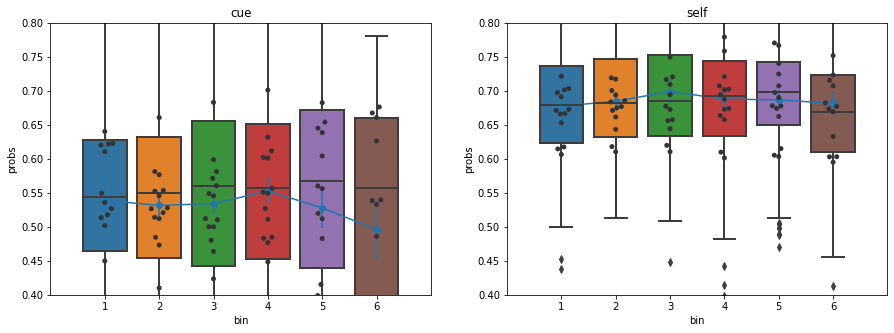

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.ticker as tck

fig = plt.figure(figsize=(15,5))    
nbins = 6
list_Type_trials = {'cue': 2, 'self': 1}
iplot = 0
for key,item in list_Type_trials.items():
    print(key,item)
    
    df = GA_df_agency[GA_df_agency['type_trial'] == item]
    df_new = df.groupby(['bin','subjectID']).mean().reset_index()
    
    mean = df_new.groupby(['bin']).mean().reset_index()
    dev = df_new.groupby(['bin']).sem().reset_index()
    x = mean['probs'].to_numpy()
    yerr = dev['probs'].to_numpy()

    axs=fig.add_subplot(121+iplot)
    axs.errorbar(np.arange(6),x, yerr=yerr, fmt='-o') #fmt=None to plot bars only
    axs=sns.boxplot(x='bin', y='probs', data=df,width=0.8,linewidth=2,showfliers = True)
    axs = sns.swarmplot(x="bin", y="probs", data=df_new, color="0.2")
    axs.set(title=key,ylim=[0.4,0.8],xlim=[-1,6])
    
    iplot +=1    
    
path = os.path.join(folderGA,'AgencyProb')
saving_figure('AgencyProb',path,fig)